In [51]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [52]:
# Let create a true population
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

print(f'population mean : {population_ages.mean()}')

population mean : 43.002372


In [54]:
# Lest randomly select some individual from from the population
np.random.seed(6)
sample_ages = np.random.choice(a=population_ages, size=500)  # Sample 1000 values
print ( sample_ages.mean() )                                 # Show sample mean
population_ages.mean() - sample_ages.mean()                  # Check difference between means

42.388


0.614372000000003

In [75]:
random.seed(10)
population_races = (["white"]*100000) + (["black"]*50000) +\
                   (["hispanic"]*50000) + (["asian"]*25000) +\
                   (["other"]*25000)
    
demo_sample = random.sample(population_races, 1000)   # Sample 1000 values

npopulation = np.array(population_races)
for race in set(demo_sample):
    actual = np.count_nonzero(npopulation == race)/len(npopulation)
    print( f'{race} proportion estimate: {demo_sample.count(race)/1000} actual : {actual}')

black proportion estimate: 0.231 actual : 0.2
asian proportion estimate: 0.099 actual : 0.1
hispanic proportion estimate: 0.192 actual : 0.2
white proportion estimate: 0.379 actual : 0.4
other proportion estimate: 0.099 actual : 0.1


-0.12008483603917186


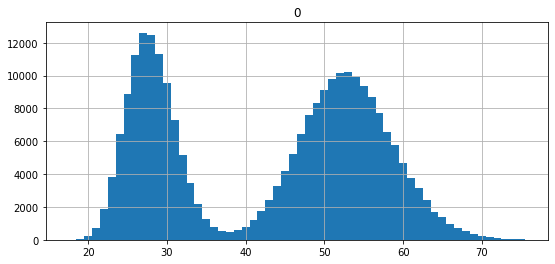

In [84]:
# Whole distribution
pd.DataFrame(population_ages).hist(bins=58, range=(17.5,75.5), figsize=(9,4))
print(stats.skew(population_ages) )

-0.056225282585406065


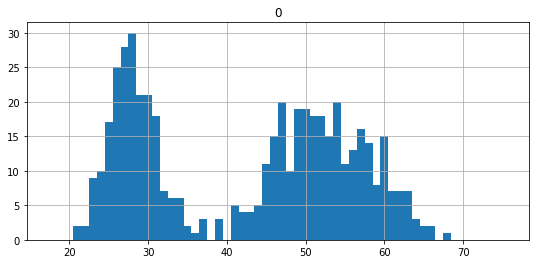

In [86]:
# sample distribution
pd.DataFrame(sample_ages).hist(bins=58, range=(17.5,75.5), figsize=(9,4))
print( stats.skew(sample_ages) )

In [96]:
x = pd.DataFrame(population_ages)

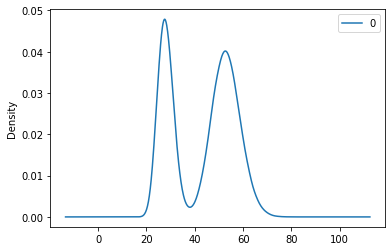

In [97]:
x.plot(kind='kde')

The central limit theorem is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution.

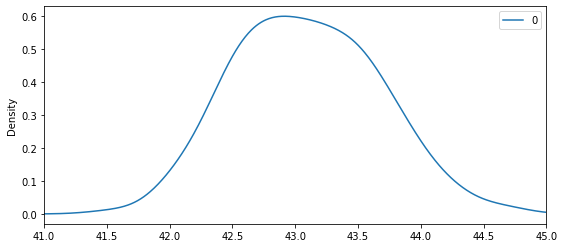

In [95]:
# Central Limit Theorem
np.random.seed(10)
point_estimates = []         # Make empty list to hold point estimates
for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density", figsize=(9,4), xlim=(41,45))   

In [98]:
# Population mean and point estimate mean get closer when sampling more and more
population_ages.mean() - np.array(point_estimates).mean()

-0.08440799999999626

# Confidence Intevals

A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to get improved estimates may not be feasible. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. Higher confidence levels result in a wider confidence intervals.
Calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range. Margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.
If you know the standard deviation of the population, the margin of error is equal to:

z∗σ/√n_hat

Where σ (sigma) is the population standard deviation, n is sample size, and z is a number known as the z-critical value. The z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval (although it is more exact to get z-critical values with stats.norm.ppf().).
Let's calculate a 95% confidence for our mean point estimate:

In [104]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

# Check the z-critical value
print(f'z-critical value: {z_critical}')                        

pop_stdev = population_ages.std()  # Get the population standard deviation
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  

print(f'Confidence interval: {confidence_interval}')

z-critical value: 1.959963984540054
Confidence interval: (41.70306406882683, 43.34293593117317)


In [105]:
print(f'Tru population mean {population_ages.mean()}')

Tru population mean 43.002372


In [106]:
np.random.seed(12)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = population_ages.std()  # Get the population standard deviation

#     stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

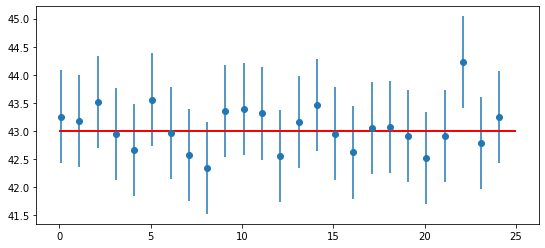

In [109]:
plt.figure(figsize=(9,4))

plt.errorbar(x=np.arange(0.1, 25, 1),  y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals], fmt='o')

plt.hlines(xmin=0, xmax=25, y=43.0023, linewidth=2.0, color="red")

In [112]:
# t-distribution with sample std

np.random.seed(10)

sample_size = 25
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

# Check the t-critical value
print(f't-critical value: {t_critical}')                        

sample_stdev = sample.std(ddof=1)    # Get the sample standard deviation
sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate

margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value: 2.0638985616280205
Confidence interval:
(37.65147508161371, 48.108524918386294)


In [118]:
# Check the difference between critical values with a sample size of 1000     
stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)  

0.0023774765933946007

In [119]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(37.65147508161371, 48.108524918386294)

In [120]:
z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.192                               # Point estimate of proportion
n = 1000                                # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

# Calculate the the interval
confidence_interval = (p - margin_of_error, p + margin_of_error) 
confidence_interval

(0.16758794241348748, 0.21641205758651252)

In [121]:
stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  0.192,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor

(0.16758794241348748, 0.21641205758651252)

NameError: name 'stats' is not defined